# Model building
## With main variables

In [25]:
# === System imports ===
sys.path.append("../../")

# === Third-party import ===

# To handle datasets
import pandas as pd
import numpy as np
# Regression models
from sklearn.linear_model import Lasso
# To evalutation the model
from sklearn.metrics import mean_squared_error
# To visualize data
import matplotlib.pyplot as plt

# To display only a limited number of columns of the dataframe in the whole notebook
pd.options.display.max_rows = 20

# === Local imports ===
import utils

ROOT = utils.get_project_root()

## Load and split train and test sets

In the notebook [2.1.feature_engineering.ipynb](../2.1.feature_engineering.ipynb), <br>
we have engineered the dataframes `X_train` and `X_test` having as variables those which have the most impact on the target variables `SalePrice`<br>
We saved these two daframes. Let's import them.

In [7]:
X_train = pd.read_csv(filepath_or_buffer=f'{ROOT}/datasets/outputs/with_main_variables/x_train.csv', index_col=0)
X_test = pd.read_csv(filepath_or_buffer=f'{ROOT}/datasets/outputs/with_main_variables/x_test.csv', index_col=0)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}') 

X_train shape: (1226, 24)
X_test shape: (146, 24)


In [8]:
X_train.head()

,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_Rare,...,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Rare,OverallQual_3,OverallQual_4,TotRmsAbvGrd_12
930,12.211060,0.660208,0.644139,0.715939,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
656,11.887931,0.479376,0.329461,0.498685,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,12.675764,0.757605,0.608237,0.866386,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1348,12.278393,0.670548,0.542767,0.724356,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55,12.103486,0.644706,0.608237,0.694371,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X_test.head()

,SalePrice,GrLivArea,GarageArea,TotalBsmtSF,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,...,TotRmsAbvGrd_12,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Rare,OverallQual_Rare,TotRmsAbvGrd_3
529,12.209188,0.955172,0.511088,1.015255,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
491,11.798104,0.700442,0.253432,0.368753,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
459,11.608236,0.552155,0.371700,0.317728,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
279,12.165251,0.835934,0.533263,0.554971,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
655,11.385092,0.499250,0.278775,0.220936,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's remove the target `Sale_price` from `X_train` and `X_test` and store it respectively in `y_train` and `y_test`

In [10]:
target = 'SalePrice'

y_train = X_train[target]
X_train.drop(target, axis=1, inplace=True)

y_test = X_test[target]
X_test.drop(target, axis=1, inplace=True)


print('Shapes:')
for df_name in ['X_train', 'X_test', 'y_train', 'y_test']:
    print(f'{df_name}:  {eval(df_name).shape}')

Shapes:
X_train:  (1226, 23)
X_test:  (146, 23)
y_train:  (1226,)
y_test:  (146,)


## ML models

Let's one linear model: **Lasso**.<br>
We are going to set the seed at **0** for models that involve randomness.

### First model: Lasso Regression

#### Train the model

In [13]:
# Create the model
model = Lasso(alpha=0.005,
              random_state=0)

# Train the model
model.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=False)

#### Make Predictions

In [16]:
# Make predictions for the train set
y_pred_train = model.predict(X_train)

# Make predictions for the test set
y_pred_test = model.predict(X_test)

#### Score prediction

The metric of evaluation for the Kaggle competition in the **Root-Mean_Squared-Error (RMSE)**  between the logarithm of the predicted value and the logarithm of the observed sales price.

Since the target variables are already log-transformed we can calculate the RMSE between them.

In [21]:
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}')
print(f'Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}')

Train RMSE: 0.18681517019098476
Test RMSE: 0.22343028783067262


#### Evaluate the prediction

Let's plot the prediction in function of the actuale values. If the model is good it should fit a line

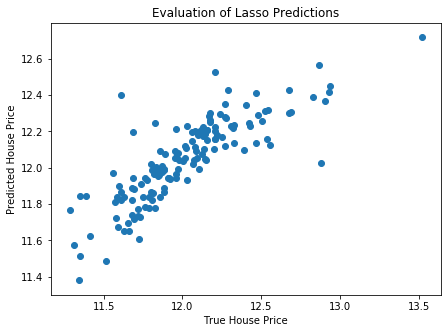

In [31]:
plt.figure(figsize=(7, 5))
plt.scatter(y_test, y_pred_test)
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
_ = plt.title('Evaluation of Lasso Predictions')

We can definity notice a trend. <br>
But this is a first try. The model can be improved

Let's plot the distribution of the error: difference between prediction and the actual value

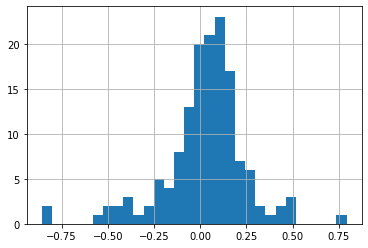

In [40]:
errors = y_pred_test-y_test
_ = errors.hist(bins=30)

The distribution of the error follows a normal distribution, but as we saw before there some outliers